# 단순 선형 회귀

# < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

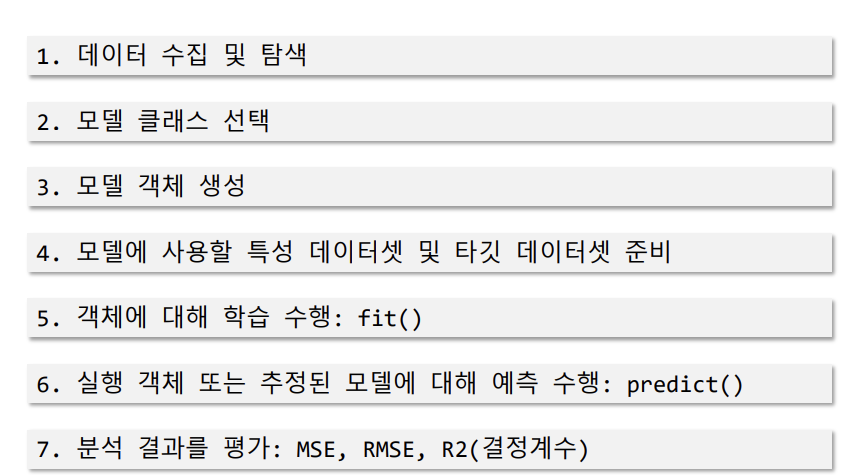

### 필요한 모듈 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [2]:
beer=pd.read_csv('data/beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

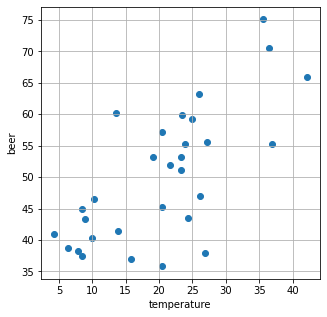

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(beer['temperature'],beer['beer'])
plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

In [5]:
# 독립 변수, 종속 변수 확인
beer['temperature']

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [7]:
# 종속 변수 확인, 레코드 수 확인
print(beer['beer'])
print(len(beer))

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64
30


###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [9]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
import numpy as np

#독립변수, 종속변수 데이터셋 준비
# 1차원인 독립변수를 sklearn의 요구사항에 따라 2차원으로 만들기
X=np.array(beer['temperature']).reshape(-1,1) 
y=beer['beer']

# 데이터 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
len(X_train)

24

In [12]:
len(X_test)

6

### 모델 구축

In [13]:

#모델 클래스 선택 후 인스턴스 객체 생성
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [15]:
# 학습 수행
# 훈련용 데이터 독립변수, 검증용 데이터 종속변수 순
reg=lr.fit(X_train,y_train) 

In [16]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_,reg.intercept_

(array([0.68513296]), 35.35610972111195)

In [19]:
#회귀식
print('y= {:.2f}x + {:.3f}'.format(reg.coef_[0],reg.intercept_))

y= 0.69x + 35.356


In [21]:
# 구축된 모델에서 예측 수행
y_pred=reg.predict(X_test)
print(np.round(y_pred,2))

[41.45 51.46 40.77 59.68 51.32 41.18]


In [23]:
y_test

27    43.3
15    59.9
23    38.2
17    75.1
8     51.1
9     44.9
Name: beer, dtype: float64

In [24]:
reg.predict([[8.9]])

array([41.45379308])

### 모델 성능 평가

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
#MSE
mse = mean_squared_error(y_test,y_pred)
#RMSE
rmse = np.sqrt(mse)

print("MSE : ", np.round(mse,2))
print("RMSE : ", np.round(rmse,3))

MSE :  55.5
RMSE :  7.45


In [27]:
#결정계수 R2
r2=r2_score(y_test,y_pred)
print('R2 : ', np.round(r2,3))

R2 :  0.635


### 시각화

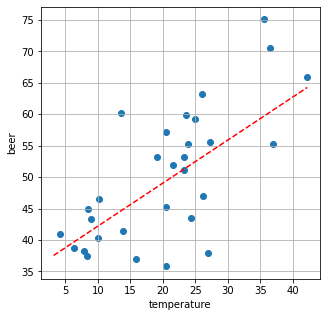

In [28]:
#y = 0.697056X + 36.06 시각화
plt.figure(figsize=(5,5))
xx=np.arange(beer['temperature'].min()-1,\
            beer['temperature'].max()+1)

yy=reg.predict(xx.reshape(len(xx),1))
plt.plot(xx,yy,linestyle='--',color='red')
# 수집한 데이터셋 시각화
plt.scatter(beer['temperature'],beer['beer'])

plt.xlabel('temperature')
plt.ylabel('beer')
plt.grid()
plt.show()

# 응용1. 나이, 키의 관계를 회귀 분석

In [29]:
# 필요한 모듈 import 
# 필요한 모듈 import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 데이터 생성/수집

In [30]:
data=pd.read_csv('data/age_height.csv')
data

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


#### 데이터 탐색

In [ ]:
# 데이터 분포 시각화

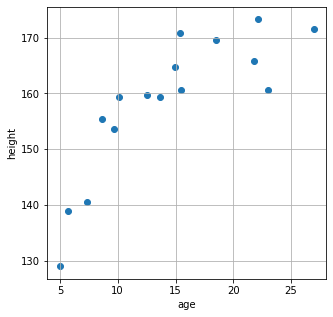

In [31]:
plt.figure(figsize=(5,5))
plt.scatter(data['age(X)'],data['height(T)'])
plt.xlabel('age')
plt.ylabel('height')
plt.grid()
plt.show()

In [37]:
X=np.array(data['age(X)']).reshape(-1,1)
y=data['height(T)']

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [38]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
#####모델 구축 및 예측
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [40]:
#모델 객체 생성  및 학습
reg=lr.fit(X_train,y_train)
# 예측 수행
y_pred=reg.predict(X_test)

In [41]:
#####모델 성능 평가
from sklearn.metrics import mean_squared_error,r2_score
#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
#RMSE : numpy의 sqrt() 함수 사용

# MSE
mse=mean_squared_error(y_test,y_pred)
#RMSE
rmse=np.sqrt(mse)

#R2
#결정계수 R2
r2=r2_score(y_test,y_pred)

print("MSE : ", np.round(mse,2))
print("RMSE : ", np.round(rmse,3))
print('R2 : ', np.round(r2,3))
#회귀식
print('y= {:.2f}x + {:.3f}'.format(reg.coef_[0],reg.intercept_))



MSE :  83.49
RMSE :  9.138
R2 :  0.663
y= 1.44x + 138.784


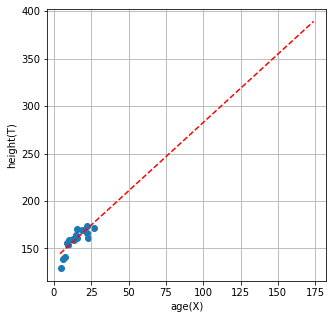

In [42]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화
#나이, 키 데이터 실제 데이터 및 회귀식 시각화

#y = 1.438635X + 138.784 시각화
plt.figure(figsize=(5,5))
xx=np.arange(data['age(X)'].min()-1,\
            data['height(T)'].max()+1)

yy=reg.predict(xx.reshape(len(xx),1))
plt.plot(xx,yy,linestyle='--',color='red')
# 수집한 데이터셋 시각화
plt.scatter(data['age(X)'],data['height(T)'])

plt.xlabel('age(X)')
plt.ylabel('height(T)')
plt.grid()
plt.show()

# < 스탯츠모델에서 단순선형회귀 수행>

In [51]:
#스탯츠모델 import
import statsmodels.api as sm

# 맥주 데이터 
# 데이터 생성
beer=pd.read_csv('data/beer.csv')

#독립변수, 종속변수 데이터셋 준비
X=np.array(beer['temperature']).reshape(-1,1)
y=beer['beer']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

X_train=sm.add_constant(X_train) # 상수항 결합으로 독립변수에 데이터 추가
X_test=sm.add_constant(X_test)

In [52]:
# 스탯츠모델
lr=sm.OLS(y_train,X_train)
reg=lr.fit()

In [54]:
# 성능 평가
y_pred=reg.predict(X_test)
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.63
Date:                Thu, 30 Jun 2022   Prob (F-statistic):           9.50e-05
Time:                        12:13:59   Log-Likelihood:                -79.854
No. Observations:                  24   AIC:                             163.7
Df Residuals:                      22   BIC:                             166.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0667      3.315     10.881      0.000      29.193      42.941
x1             0.6971      0.147      4.757      0.000       0.393       1.001
==============================================================================
Omnibus:                        1.282   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                0.363
Skew:                          -0.241   Prob(JB):                        0.834
Kurtosis:                       3.360   Cond. No.                         52.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 응용2 : 농어 무게 예측

In [57]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


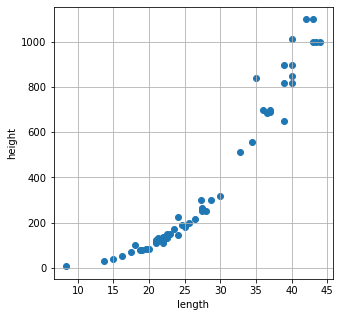

In [67]:
# 시각화
plt.figure(figsize=(5,5))
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('height')
plt.grid()
plt.show()

In [60]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
import numpy as np

#독립변수, 종속변수 데이터셋 준비
# 1차원인 독립변수를 sklearn의 요구사항에 따라 2차원으로 만들기
X=perch_length.reshape(-1,1) 
y=perch_weight

# 데이터 분리
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [61]:
#모델 클래스 선택 후 인스턴스 객체 생성
from sklearn.linear_model import LinearRegression

lr=LinearRegression()


In [62]:
# 학습 수행
# 훈련용 데이터 독립변수, 검증용 데이터 종속변수 순
reg=lr.fit(X_train,y_train) 

In [63]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
reg.coef_,reg.intercept_

(array([35.63110638]), -618.3317511711566)

In [64]:
#회귀식
print('y= {:.2f}x + {:.3f}'.format(reg.coef_[0],reg.intercept_))

y= 35.63x + -618.332


In [65]:
# 구축된 모델에서 예측 수행
y_pred=reg.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error,r2_score
#MSE
mse = mean_squared_error(y_test,y_pred)
#RMSE
rmse = np.sqrt(mse)

print("MSE : ", np.round(mse,2))
print("RMSE : ", np.round(rmse,3))
#결정계수 R2
r2=r2_score(y_test,y_pred)
print('R2 : ', np.round(r2,3))

MSE :  14550.24
RMSE :  120.624
R2 :  0.88


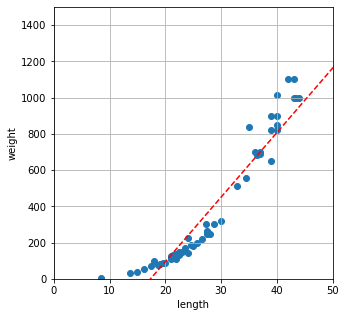

In [71]:
plt.figure(figsize=(5,5))
xx=np.arange(perch_length.min()-1,\
            perch_weight.max()+1)

yy=reg.predict(xx.reshape(len(xx),1))
plt.plot(xx,yy,linestyle='--',color='red')
# 수집한 데이터셋 시각화
plt.scatter(perch_length,perch_weight)

plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(0,50)
plt.ylim(0,1500)
plt.grid()
plt.show()

In [ ]:
# 길이가 50cm일때 농어의 무게?
reg.predict([[50]])

# 응용3: 보스턴 집값 선형 회귀(statsmodel)

### 데이터 수집

### 데이터 탐색

### 데이터 준비

In [ ]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환

### 학습용/ 검증용 데이터 분리

In [ ]:
# 조건 : 학습 7, 검증 3
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라


### 모델 구축

### 모델 평가

### 시각화

In [ ]:
# 방의 갯수와 주택 중간 가격 관계 시긱화

# y = 8.46 X - 30.57
